# Imports

In [1]:
import numpy as np
import xarray as xr
import h5py
from os.path import join

import sys
sys.path.append('./FERMI_2020-07/')

import matplotlib.pyplot as plt
import process_FERMI as pf

from importlib import reload

In [16]:
# execute after modifying library
pf = reload(pf)

In [3]:
%matplotlib inline

# load non-image data

In [5]:
basefolder = 'testdata/F6_Scan2/'

exp = pf.get_exp_dataframe(basefolder)
for k in ['xgm_UH', 'xgm_SH']:
    exp[k + '_mean'] = exp[k].apply(np.mean)


Let's have a look at it

In [6]:
exp

,filename,xgm_UH,xgm_SH,filter_seed,wavelength,diode_I0,polarization,harmonic,delay,alignz,samplez,valve_pos2,valve_dpi3,comment,xgm_UH_mean,xgm_SH_mean
0,testdata/F6_Scan2/rawdata/F6_Scan2_163566276.h5,"[31.608288077805778, 24.054997914248865, 19.95...","[4.013813812184072, 3.1157464618981434, 2.5481...",Al-200,20.8,"[148.29769134521484, 110.25238037109375, 86.64...",3.0,12.0,139.60,53.499987,-0.000529,3,3,"1. 1 of 141. Delay 139.600 mm - IR 123uJ, UV 8...",27.248608,3.469665
1,testdata/F6_Scan2/rawdata/F6_Scan2_163566397.h5,"[31.818450242942262, 30.080162743601022, 28.83...","[4.0090751726935405, 3.8203728650552846, 3.701...",Al-200,20.8,"[141.24155044555664, 128.84445190429688, 133.1...",3.0,12.0,139.60,53.499987,-0.000532,3,3,"1. 1 of 141. Delay 139.600 mm - IR 123uJ, UV 8...",30.014540,3.762386
2,testdata/F6_Scan2/rawdata/F6_Scan2_163566781.h5,"[34.596677782294556, 34.39155355561752, 31.670...","[4.350732913795905, 4.437113089158626, 3.99594...",Al-200,20.8,"[156.58235549926758, 166.76387786865234, 139.6...",3.0,12.0,139.61,53.499987,-0.000532,3,3,"1. 2 of 141. Delay 139.610 mm - IR 123uJ, UV 8...",33.381774,4.146593
3,testdata/F6_Scan2/rawdata/F6_Scan2_163566900.h5,"[26.521180086748224, 31.86666150189898, 35.154...","[3.308038811195036, 3.9767212811654717, 4.3425...",Al-200,20.8,"[120.05538940429688, 145.97711563110352, 164.0...",3.0,12.0,139.61,53.499987,-0.000531,3,3,"1. 2 of 141. Delay 139.610 mm - IR 123uJ, UV 8...",32.857962,4.032113
4,testdata/F6_Scan2/rawdata/F6_Scan2_163567113.h5,"[34.18544635300319, 36.20215601083588, 37.6335...","[4.022032198164109, 4.194616784712914, 4.37295...",Al-200,20.8,"[149.94535446166992, 155.57069778442383, 167.1...",3.0,12.0,139.62,53.499987,-0.000532,3,3,"1. 3 of 141. Delay 139.620 mm - IR 123uJ, UV 8...",30.415972,3.563510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,testdata/F6_Scan2/rawdata/F6_Scan2_163605601.h5,"[31.905453769987062, 33.975783555776324, 35.10...","[4.364267069293834, 4.648768033744595, 4.79763...",Al-200,20.8,"[135.2497100830078, 152.2547721862793, 171.562...",3.0,12.0,140.68,53.499987,-0.000543,3,3,"1. 109 of 141. Delay 140.680 mm - IR 123uJ, UV...",31.427516,4.291722
218,testdata/F6_Scan2/rawdata/F6_Scan2_163605813.h5,"[34.06444875340083, 29.563197529935415, 31.995...","[4.173998282773444, 3.5841000438707624, 3.8629...",Al-200,20.8,"[153.7405014038086, 134.75561141967773, 138.66...",3.0,12.0,140.69,53.499987,-0.000545,3,3,"1. 110 of 141. Delay 140.690 mm - IR 123uJ, UV...",28.568146,3.489429
219,testdata/F6_Scan2/rawdata/F6_Scan2_163605935.h5,"[37.82386436859074, 37.22624993158714, 33.4044...","[4.640610749866626, 4.517356515366241, 4.00965...",Al-200,20.8,"[183.96520614624023, 172.15490341186523, 147.6...",3.0,12.0,140.69,53.499987,-0.000545,3,3,"1. 110 of 141. Delay 140.690 mm - IR 123uJ, UV...",31.670017,3.870167
220,testdata/F6_Scan2/rawdata/F6_Scan2_163606143.h5,"[34.4212664184427, 37.306444676703265, 37.0816...","[4.181285181852819, 4.559977205338056, 4.56885...",Al-200,20.8,"[155.4488182067871, 176.15318298339844, 171.21...",3.0,12.0,140.70,53.499987,-0.000545,3,3,"1. 111 of 141. Delay 140.700 mm - IR 123uJ, UV...",33.080299,4.055835


## filter entries

In [6]:
# ...

# Plot single image

Load an image and it's meta data. This will be used to setup the azimuthal integrator. All following images do not need to be loaded and plotted for the functionning of this script.

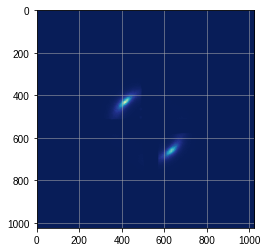

In [21]:
im, meta = pf.loadh5(exp.loc[12, 'filename'], extra_keys=['alignz'])

fig, ax = plt.subplots()
ax.imshow(im)

# Set up the azimuthal integration
This has to be done only once (unless the image center shifts, or the image shape changes).
Reusing the AzimuthalIntegrator instance is very fast.

You need to specifiy the center (determine it via the plotted image above). The rest is filled in automatically from the image shape and image meta data. 

In [22]:
ai = pf.AzimuthalIntegrator(im.shape, dist = meta['alignz'] * 1e-3, center = (549, 527), polar_range = (0, 179), nint = 100)

norm = ai(np.ones_like(im))

# Process delay scan
set up empty DataArray using xarray

In [24]:
scan = xr.DataArray(
    np.zeros([len(exp), len(ai.theta)]),
    dims=['delay', 'theta'],
    coords={'theta': ai.theta, 'delay': exp.delay}
)

test it on our single image

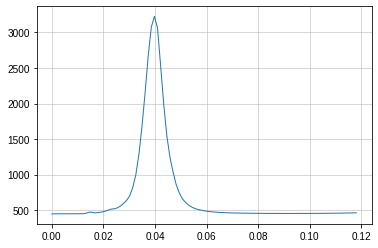

In [25]:
fig, ax = plt.subplots()
ax.plot(ai.theta, ai(im) / norm)

## load dark
I'm just loading a static single dark here

In [26]:
dark = pf.loadh5('testdata/F6_Scan2_BG/rawdata/F6_Scan2_BG_163566569.h5')[0]
dark = dark.astype(float)

## crunch

In [27]:
for index, r in exp.iterrows():
    im, meta = pf.loadh5(r['filename'])
    im = im - dark
    scan.loc[{'delay': r['delay']}] = ai(im) / norm / r['xgm_SH_mean']


## plot

In [31]:
scan

<xarray.DataArray (delay: 222, theta: 99)>
array([[1.28464591, 0.71974668, 0.95450508, ..., 4.06701845, 4.36796737,
        4.51117764],
       [1.28464591, 0.71974668, 0.95450508, ..., 4.06701845, 4.36796737,
        4.51117764],
       [1.52938848, 0.94594561, 0.95935891, ..., 4.17436435, 4.40716617,
        4.63379209],
       ...,
       [1.9852716 , 1.01868408, 1.28407744, ..., 4.0029165 , 4.26336382,
        4.46627478],
       [2.27386002, 0.94095816, 0.9946116 , ..., 3.94451775, 4.27849542,
        4.39038582],
       [2.27386002, 0.94095816, 0.9946116 , ..., 3.94451775, 4.27849542,
        4.39038582]])
Coordinates:
  * theta    (theta) float64 0.0 0.001205 0.00241 ... 0.1157 0.1169 0.1181
  * delay    (delay) float64 139.6 139.6 139.6 139.6 ... 140.7 140.7 140.7 140.7

In [39]:
wavelength = np.unique(exp.wavelength)
scan['q'] = 2 * np.pi * np.sin(scan.theta) / wavelength
scan = scan.swap_dims({'theta': 'q'})

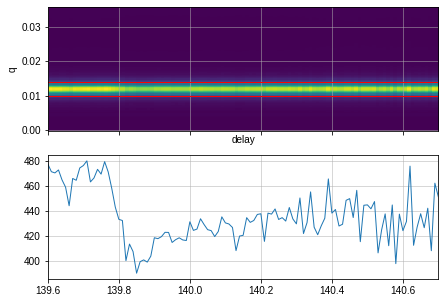

In [43]:
qmin, qmax = 0.01, 0.014

demag = scan.where((scan.q > qmin) & (scan.q < qmax)).mean('q')

fig, [ax1, ax2] = plt.subplots(nrows=2, figsize=(7, 5), sharex=True)
scan.plot.imshow(x='delay', y='q', ax=ax1, vmin=0, cmap='viridis', add_colorbar=False)
ax2.plot(demag.delay, demag)

for r in [qmin, qmax]:
    ax1.axhline(r, c='r', lw=1)